**Finite Sample Breakdown Point:** The smallest proprotion of $n$ observations that can make a statistic arbirtarily large or small.

Mean = 1/n

Median = 0.5

DNS: measure of digit naming speed = Predictor Variable

wordIdent: measure of word identification = Response Variable

In [1]:
options(repr.plot.width = 7, repr.plot.height = 5)
library(ggplot2)

In [3]:
reading <- read.csv("LDoi.csv")
#reading

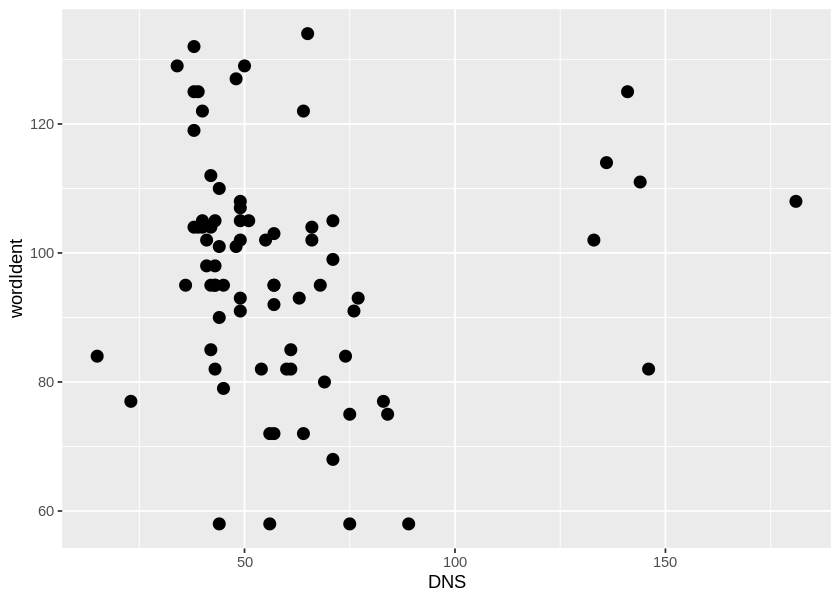

In [4]:
ggplot(reading, aes(x = DNS, y = wordIdent)) +
  geom_point(size = 3)

In [5]:
readMod <- lm(wordIdent ~ DNS, data = reading)

In [6]:
print(readMod$coefficients)

(Intercept)         DNS 
97.95728197 -0.02136595 


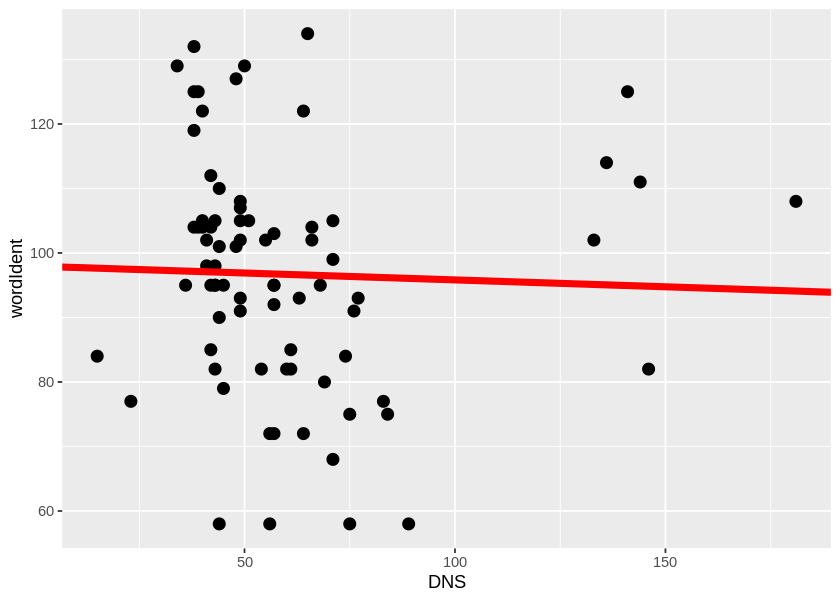

In [7]:
ggplot(reading, aes(x = DNS, y = wordIdent)) +
  geom_point(size = 3) +
  geom_abline(intercept = readMod$coefficients[1],
              slope = readMod$coefficients[2],
              colour = "red", linewidth = 2)

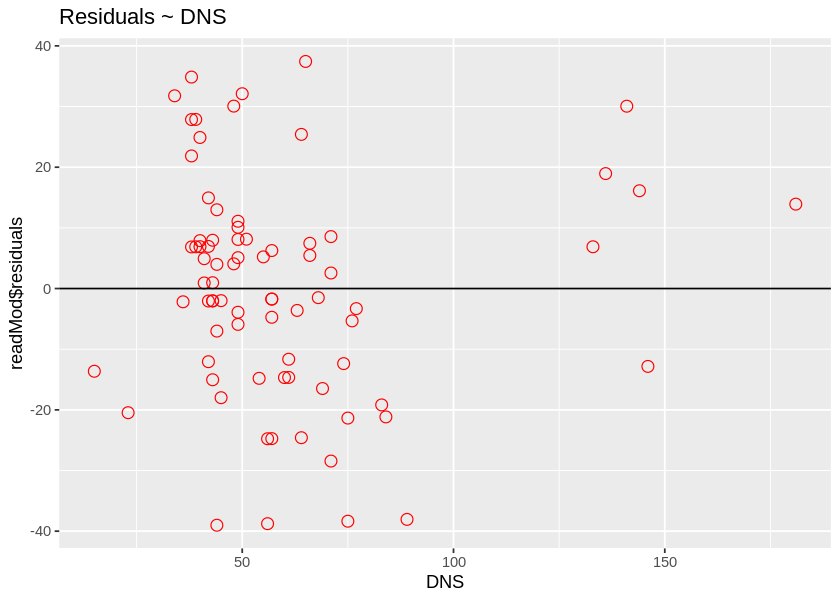

In [10]:
ggplot(reading, aes(x = DNS, y = readMod$residuals)) +
  geom_point(shape = 1, colour = "red", size = 3) +
  ggtitle("Residuals ~ DNS") +
  geom_hline(yintercept = 0)

# Detecting Outliers (on x-axis values) using the MAD-median Rule.

### $$\frac{|x - median(x)|}{MADN} > 2.24 $$

In [13]:
reading$out <- abs(reading$DNS - median(reading$DNS)) / mad(reading$DNS) > 2.24

In [15]:
outliers <- subset(reading, out == TRUE)
outliers

,Subject,DNS,wordIdent,out
,<int>,<int>,<int>,<lgl>
38,38,141,125,TRUE
39,39,133,102,TRUE
47,47,181,108,TRUE
50,50,15,84,TRUE
54,54,146,82,TRUE
55,55,144,111,TRUE
56,56,89,58,TRUE
66,66,136,114,TRUE
74,74,84,75,TRUE


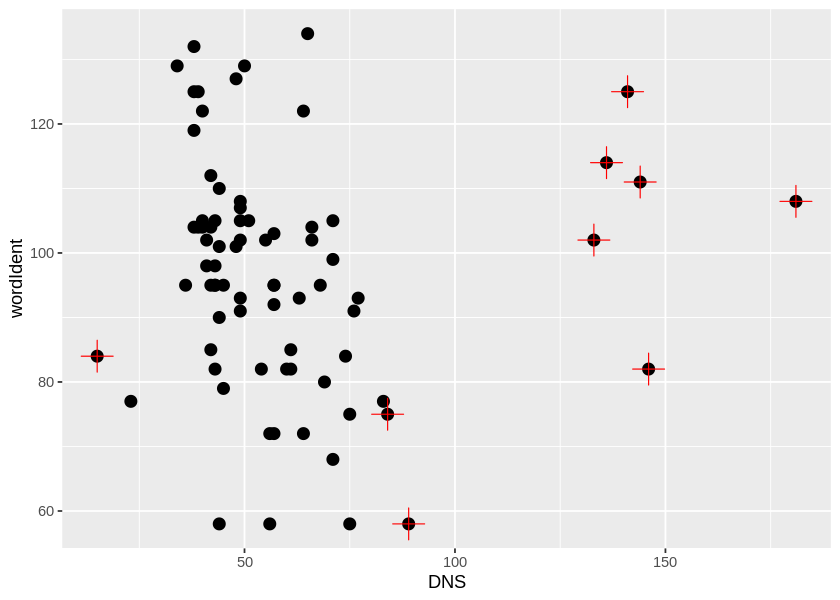

In [19]:
ggplot(reading, aes(x = DNS, y = wordIdent)) +
  geom_point(size = 3) +
  geom_point(data = outliers, aes(x = DNS, y = wordIdent),
              shape = 3, colour = "red", size = 6)

In [21]:
reading_cln <- subset(reading, out != TRUE)
#reading_cln

In [23]:
out_Model <- lm(wordIdent ~ DNS, data = reading_cln)
out_Model


Call:
lm(formula = wordIdent ~ DNS, data = reading_cln)

Coefficients:
(Intercept)          DNS  
   122.8163      -0.4975  


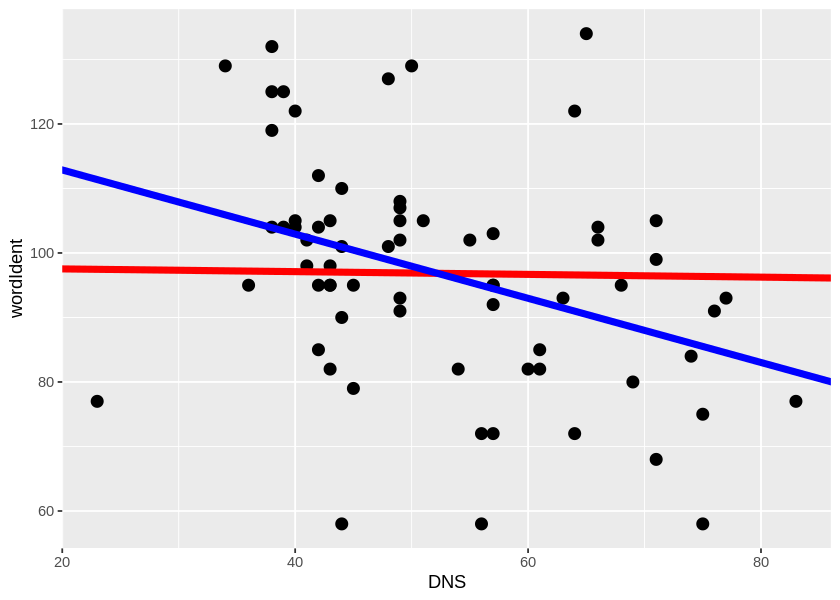

In [25]:
ggplot(reading_cln, aes(x = DNS, y = wordIdent)) +
  geom_point(size = 3) +

  # Old Model
  geom_abline(intercept = readMod$coefficients[1],
              slope = readMod$coefficients[2],
              colour = "red", linewidth = 2) +
                
  # New Model
  geom_abline(intercept = out_Model$coefficients[1],
              slope = out_Model$coefficients[2],
              colour = "blue", linewidth = 2)

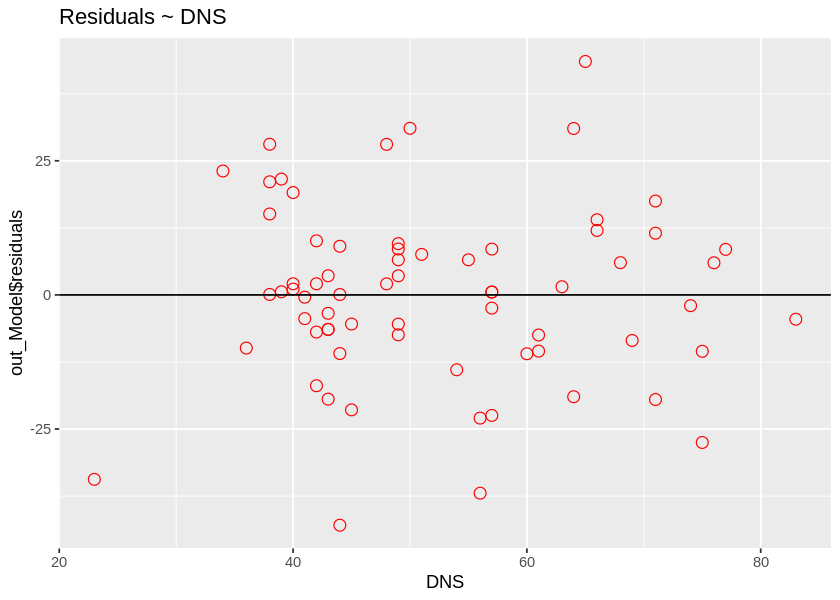

In [27]:
ggplot(reading_cln, aes(x = DNS, y = out_Model$residuals)) +
  geom_point(shape = 1, colour = "red", size = 3) +
  ggtitle("Residuals ~ DNS") +
  geom_hline(yintercept = 0)

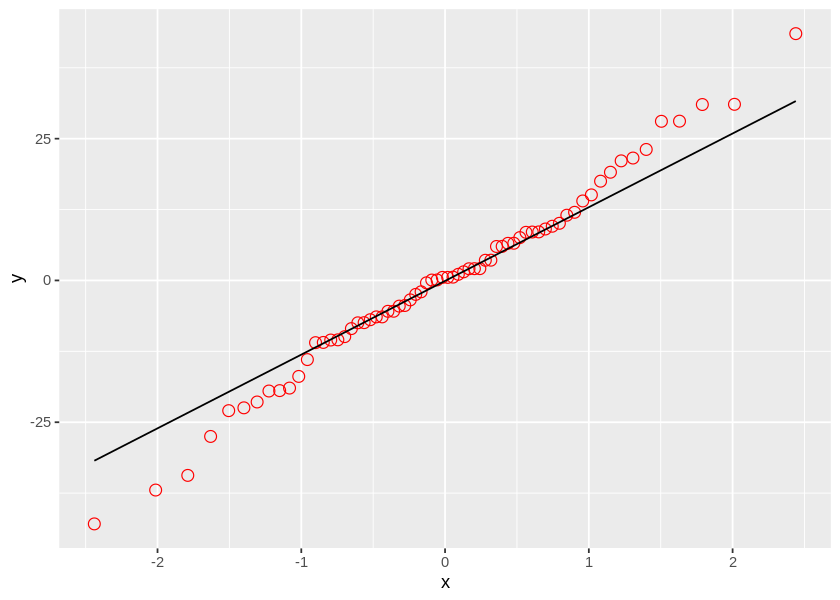

In [30]:
ggplot(reading_cln, aes(sample = out_Model$residuals)) +
  stat_qq(shape = 1, colour = "red", size = 3) +
  stat_qq_line()

In [31]:
# Full Data Model
summary(readMod)


Call:
lm(formula = wordIdent ~ DNS, data = reading)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.017 -12.838   0.919   8.132  37.432 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 97.95728    4.73432  20.691   <2e-16 ***
DNS         -0.02137    0.07097  -0.301    0.764    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.16 on 75 degrees of freedom
Multiple R-squared:  0.001207,	Adjusted R-squared:  -0.01211 
F-statistic: 0.09064 on 1 and 75 DF,  p-value: 0.7642


In [32]:
summary(out_Model)


Call:
lm(formula = wordIdent ~ DNS, data = reading_cln)

Residuals:
    Min      1Q  Median      3Q     Max 
-42.928  -8.845   0.539   8.688  43.519 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 122.8163     8.4499  14.535  < 2e-16 ***
DNS          -0.4975     0.1572  -3.166  0.00234 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.6 on 66 degrees of freedom
Multiple R-squared:  0.1318,	Adjusted R-squared:  0.1187 
F-statistic: 10.02 on 1 and 66 DF,  p-value: 0.002343


In [34]:
sqrt(.1318)

[1] 0.3630427